# Wasserstein distance

First install POT using :
    - pip install pot

In [1]:
import numpy as np # always need it
import scipy as sp # often use it
import pylab as pl # do the plots

import ot # ot 


## First OT Problem
 
 We will solve the Bakery/Cafés problem of transporting croissants from a number of Bakeries to Cafés in a City (In this case Manhattan). We did a quick google map search in Manhattan for bakeries and Cafés:
 
 ![bak.png](https://remi.flamary.com/cours/otml/bak.png)
 
 We extracted from this search their positions and generated fictional production and sale number (that both sum to the same value).
 
 We have acess to the position of Bakeries ```bakery_pos``` and their respective production ```bakery_prod``` which describe the source distribution. The Cafés where the croissants are sold are defiend also by their position ```cafe_pos``` and ```cafe_prod```. For fun we also provide a map ```Imap``` that will illustrate the position of these shops in the city.
 
 
Now we load the data
 
 

In [2]:
data=np.load(os.path.realpath('../data/manhattan.npz'))

bakery_pos=data['bakery_pos']
bakery_prod=data['bakery_prod']
cafe_pos=data['cafe_pos']
cafe_prod=data['cafe_prod']
Imap=data['Imap']

print('Bakery production: {}'.format(bakery_prod))
print('Cafe sale: {}'.format(cafe_prod))
print('Total croissants : {}'.format(cafe_prod.sum()))


Bakery production: [ 31.  48.  82.  30.  40.  48.  89.  73.]
Cafe sale: [ 82.  88.  92.  88.  91.]
Total croissants : 441.0


#### Plotting bakeries in the city
Next we plot the position of the bakeries and cafés on the map. The size of the circle is proportional to their production.



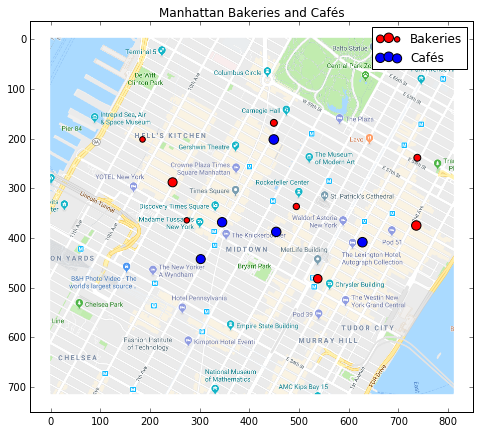

In [3]:
pl.figure(1,(8,7))
pl.clf()
pl.imshow(Imap,interpolation='bilinear') # plot the map
pl.scatter(bakery_pos[:,0],bakery_pos[:,1],s=bakery_prod,c='r', edgecolors='k',label='Bakeries')
pl.scatter(cafe_pos[:,0],cafe_pos[:,1],s=cafe_prod,c='b', edgecolors='k',label='Cafés')
pl.legend()
pl.title('Manhattan Bakeries and Cafés')
pl.show()

#### Cost matrix
 
 We compute the cost matrix between the bakeries and the cafés, this will be the transport cost matrix. This can be done using the [ot.dist](http://pot.readthedocs.io/en/stable/all.html#ot.dist) that defaults to squared euclidean distance but can return other things such as cityblock (or manhattan distance). 


#### Solving the OT problem with [ot.emd](http://pot.readthedocs.io/en/stable/all.html#ot.emd)


#### Visualise the cost matrix and the transportation matrix using imshow



#### Transportation plan vizualization
 
 A good vizualization of the OT matrix in the 2D plane is to denote the transportation of mass between a Bakery and a Café by a line. This can easily be done with a double ```for``` loop.
 
 In order to make it more interpretable one can also use the ```alpha``` parameter of plot and set it to ```alpha=G[i,j]/G[i,j].max()```. 


### OT loss and dual variables
 
 The resulting wasserstein loss loss is of the form:
 $W=\sum_{i,j}\pi_{i,j}M_{i,j}$
 where $\pi$ is the optimal transport matrix.
 